In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [40]:
a = np.array([[[1,2,3], [4,5,6]], [[11,22,33], [44,55,66]]])
a.shape

(2, 2, 3)

In [32]:
I = cv2.imread('C:/Users/1narv/python/openCV_python/task0/forest.jpg')
# Number of histogram bins
histSize = 256
# Histogram range
 # The upper boundary is exclusive
histRange = (0 , 256)
print(I.shape)
# Split an image into color layers
# OpenCV stores RGB image as BGR
I_BGR = cv2.split(I)
# Calculate a histogram for each layer
bHist = cv2.calcHist(I_BGR, [0], None, [histSize], histRange)
gHist = cv2.calcHist(I_BGR, [1], None, [histSize], histRange )
rHist = cv2.calcHist(I_BGR, [2], None, [histSize], histRange )

(1050, 1400, 3)


In [41]:
I = cv2.imread('C:/Users/1narv/python/openCV_python/task0/forest.jpg')
# Number of histogram bins
histSize = 256
# Histogram range
 # The upper boundary is exclusive
histRange = (0 , 256)
print(I.shape)
# Split an image into color layers
# OpenCV stores RGB image as BGR
# Calculate a histogram for each layer
Hist = cv2.calcHist([I], [0,1], None, [histSize*histSize], histRange)

(1050, 1400, 3)


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:1294: error: (-215:Assertion failed) csz == 0 || csz == dims in function 'cv::calcHist'


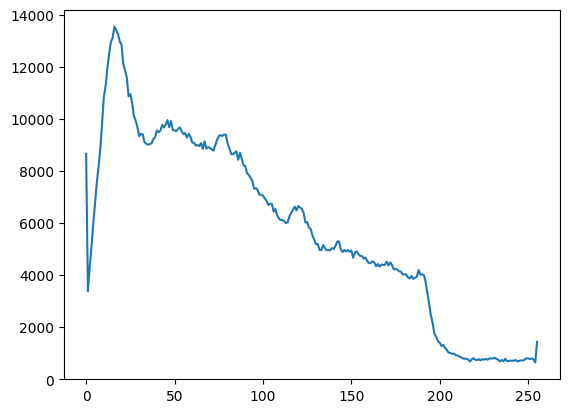

In [22]:
plt.plot(bHist)